<a href="https://colab.research.google.com/github/ajholman1/semrush_google_search_results/blob/main/How_to_Scrape_%26_Analyze_Google_Search_Results_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
sys.version

'3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]'

In [2]:
from googlesearch import search
print("Googlesearch package installed successfully!")

# see documentation for this library here: https://python-googlesearch.readthedocs.io/en/latest/

Googlesearch package installed successfully!


In [9]:
# set query to search for in Google
query = "get your guide denver"

#execute query and store search results
results = search(query, tld = "com", lang = "en", stop = 5, pause = 2)

# iterate over all search results and then print them
for item in results:
  print(item)

# prints the top 5 search results because stop = 5

https://www.getyourguide.com/denver-l948/
https://www.getyourguide.com/downtown-denver-l104817/
https://www.getyourguide.com/en-gb/downtown-denver-l104817/day-trips-tc172/?visitor-id=HZA4K2B36VLLEI31FADWK5M8DYXRADPX
https://www.getyourguide.com/red-rocks-amphitheatre-l104814/
https://www.getyourguide.com/en-gb/downtown-denver-l104817/day-trips-tc172/?visitor-id=AOSEZ2JZKL9O9C1LXCND36BMAQTWCUH9


Verify the results are accurate by using the Keyword Overview tool in SEMRush: https://www.semrush.com/analytics/keywordoverview/

Open tool and enter your query into the search box and set location to US

Looks like all check out except the last one in this image here (position 5)
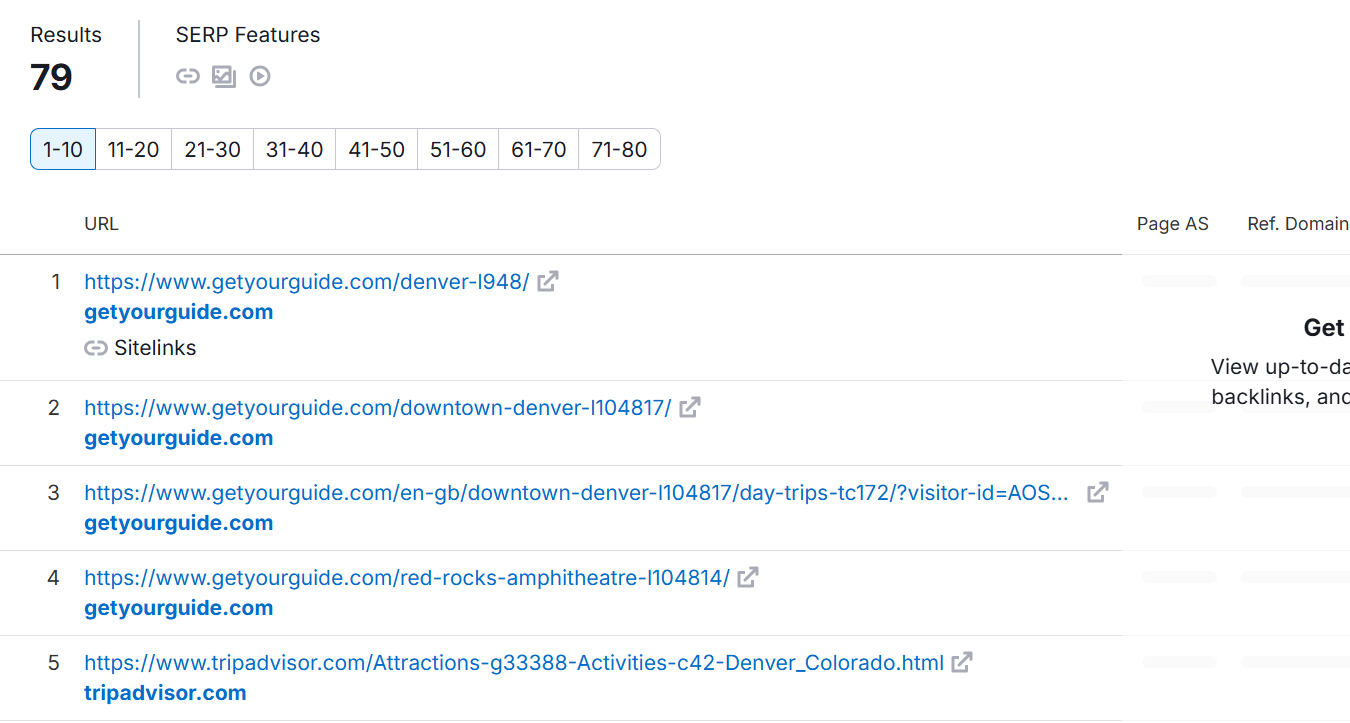

In [48]:
# Change query to "denver get your guide"
# which keywords’ SERPs are similar enough to be targeted with a single page?
#The larger the overlap, the more likely we can rank for a primary and secondary query with the same page.

import pandas as pd

main_query = "denver get your guide"

secondary_queries = ["denver's tours", "denver guided tours", "denver guides", "denver get your guides", "denver experiences"]

#Execute the main query and store search results
main_results = search(main_query, tld= "com", lang = "en", stop = 5, pause = 2)
main_urls = set(main_results)

#Dictionary to store URL percentages for each query
url_percentages = {}

#iterate over the queries

for url in secondary_queries:
  secondary_results = search(url, tld = "com", lang = "en", stop = 5, pause = 2)
  secondary_urls = set(secondary_results)
  percentage = (len(main_urls.intersection(secondary_urls))/len(main_urls)) * 100
  url_percentages[url] = percentage



In [49]:
print(main_urls)
print(secondary_urls)
print(percentage)

{'https://www.getyourguide.com/denver-l948/', 'https://www.getyourguide.com/en-gb/downtown-denver-l104817/day-trips-tc172/?visitor-id=HZA4K2B36VLLEI31FADWK5M8DYXRADPX', 'https://www.getyourguide.com/en-gb/downtown-denver-l104817/day-trips-tc172/?visitor-id=AOSEZ2JZKL9O9C1LXCND36BMAQTWCUH9', 'https://www.getyourguide.com/red-rocks-amphitheatre-l104814/', 'https://www.getyourguide.com/downtown-denver-l104817/'}
{'https://www.denver.org/things-to-do/day-trips-around-colorado/attractions-day-trips-near-denver/', 'https://www.denver.org/things-to-do/', 'https://www.denver.org/things-to-do/tours/free-tours/', 'https://www.denver.org/things-to-do/attractions/must-see-do/', 'https://www.denver.org/blog/post/spring-summer-things-to-do/'}
0.0


In [50]:
# url_percentages[url] = percentage
#create a dataframe from the url_percentages dictionary

df_url_percentages = pd.DataFrame(url_percentages.items(), columns = ["Secondary Query", "Percentage"])

# Sort the dataframe by percentage in descending order
df_url_percentages = df_url_percentages.sort_values(by = "Percentage", ascending=False)


In [51]:
#Print the sorted dataframe
df_url_percentages

,Secondary Query,Percentage
3,denver get your guides,40.0
0,denver's tours,0.0
1,denver guided tours,0.0
2,denver guides,0.0
4,denver experiences,0.0


In [52]:
# Visualize results
import matplotlib.pyplot as plt

sorted_percentages = sorted(url_percentages.items(), key=lambda x: x[1], reverse=True)
sorted_queries, sorted_percentages = zip(*sorted_percentages)

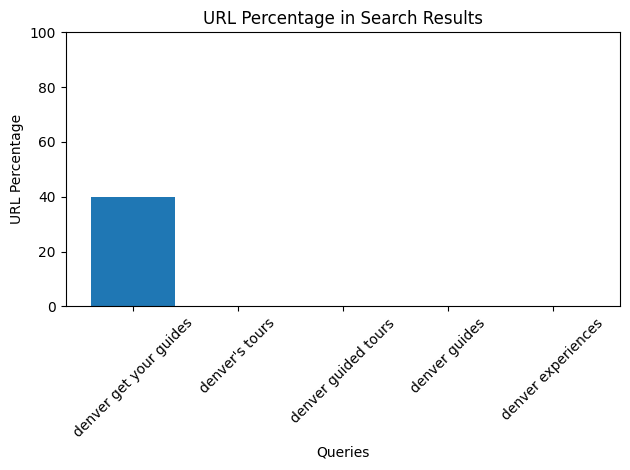

In [53]:
#Plotting the URL percentages wirth sorted x-axis
plt.bar(sorted_queries, sorted_percentages)
plt.xlabel("Queries")
plt.ylabel("URL Percentage")
plt.title("URL Percentage in Search Results")
plt.xticks(rotation=45)
plt.ylim(0,100)
plt.tight_layout()
plt.show()